In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#READ AND CHECK CSV FILE
heart_stroke_df = pd.read_csv("./healthcare-dataset-stroke-data.csv")

In [4]:
heart_stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


##Attribute Information##
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

##### Missing Data Analisys

In [6]:
TOTAL = heart_stroke_df.isnull().sum() # total of missing values
PERCENT = round(TOTAL/len(heart_stroke_df)*100,1) #Percentage of missinig values
df_miss_dat = pd.DataFrame(columns={"total":TOTAL, "Percent":PERCENT}, index=heart_stroke_df.columns) #create Dataframe for missing values
df_miss_dat["total"]  = TOTAL #completing columns with calculated values
df_miss_dat["Percent"] = PERCENT
df_M_V = df_miss_dat.sort_values(by="Percent", ascending=False) # final dataframe
df_M_V

,total,Percent
bmi,201,3.9
id,0,0.0
gender,0,0.0
age,0,0.0
hypertension,0,0.0
heart_disease,0,0.0
ever_married,0,0.0
work_type,0,0.0
Residence_type,0,0.0
avg_glucose_level,0,0.0


Notes:
Only Body Mass Index has missing values, with a small percentage (%3.9)

#### Features Analisys

##### Categorical features

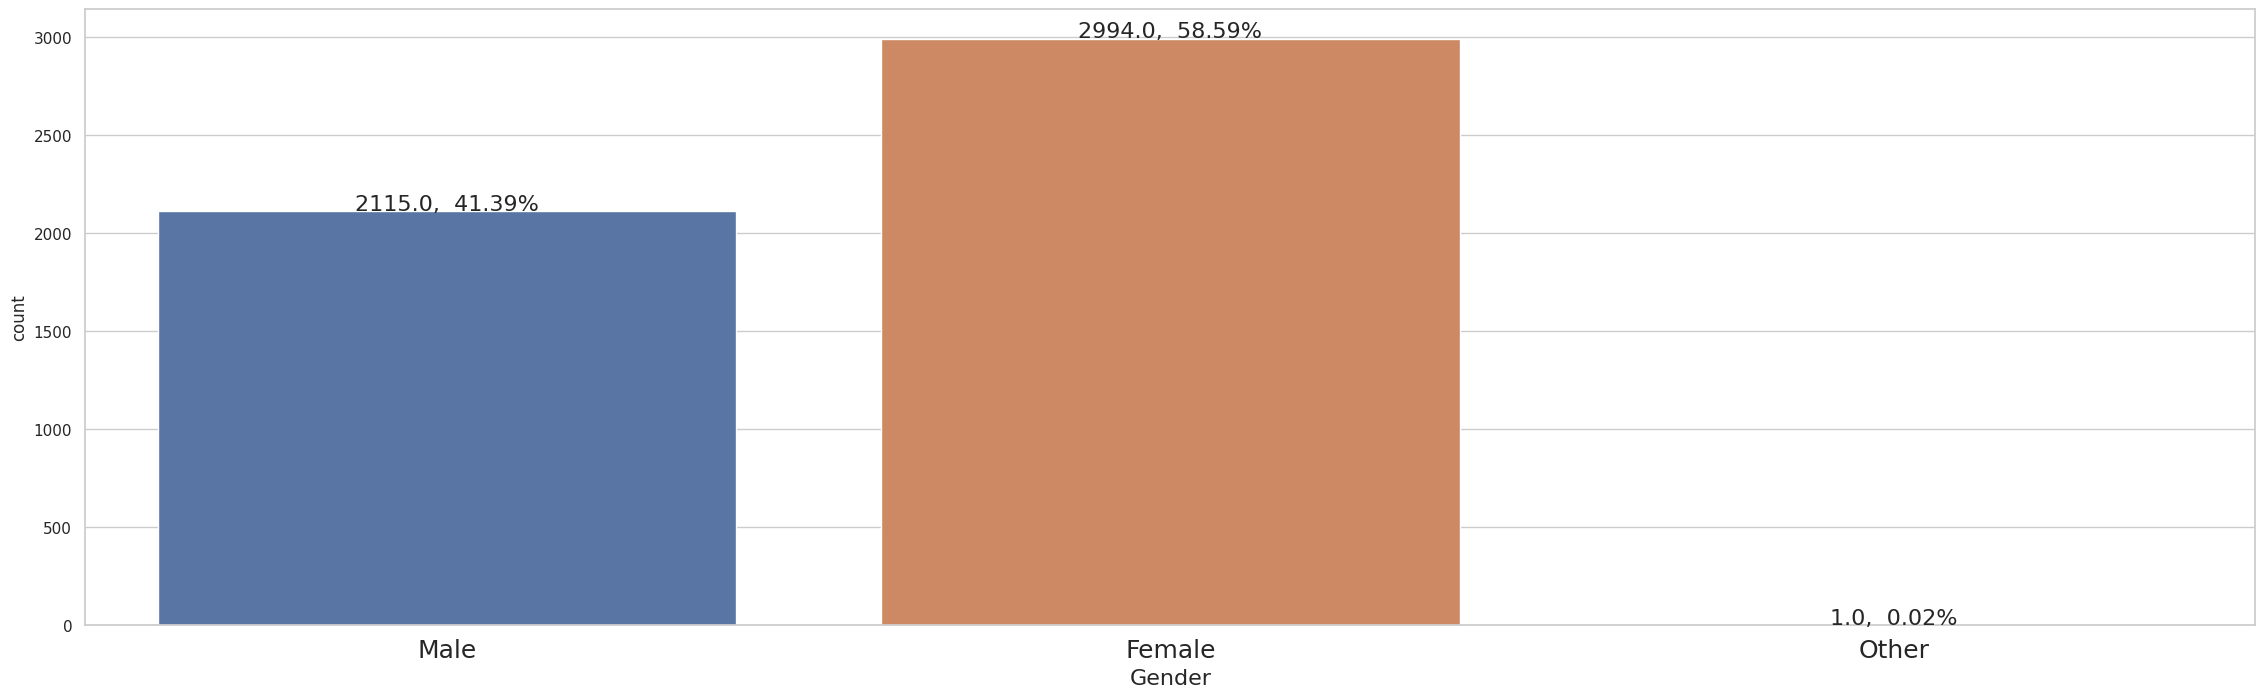

In [14]:
"""
LET'S ANALYZE GENDER USING A COUNT PLOT

"""

sns.set(style="whitegrid")
total = sum(heart_stroke_df["gender"].notna()) # I consider the not NaNs values
# Defining the plot size
plt.figure(figsize=(28, 8))

# Defining the values for x-axis
# and from which dataframe the values are to be picked
plots = sns.countplot(x="gender", data=heart_stroke_df)

# Iterate over the bars one-by-one
for bar in plots.patches:

	# Using Matplotlib's annotate function and
	# passing the coordinates where the annotation shall be done
    plots.annotate(f"{bar.get_height()},  {round((100 * bar.get_height()/total),2)}%",(bar.get_x() + bar.get_width() / 2,bar.get_height()),
                   ha='center', va='center',
                   size=16, xytext=(0, 5),textcoords='offset points')
# Setting the title for the graph
plt.xlabel("Gender", fontsize=16)
plt.xticks(fontsize=18)
# showing the plot
plt.show()

In the data set there are: 2115 males(41.39%), 2994 females(58.89%) and 1 person identified with other gender(0.02%)

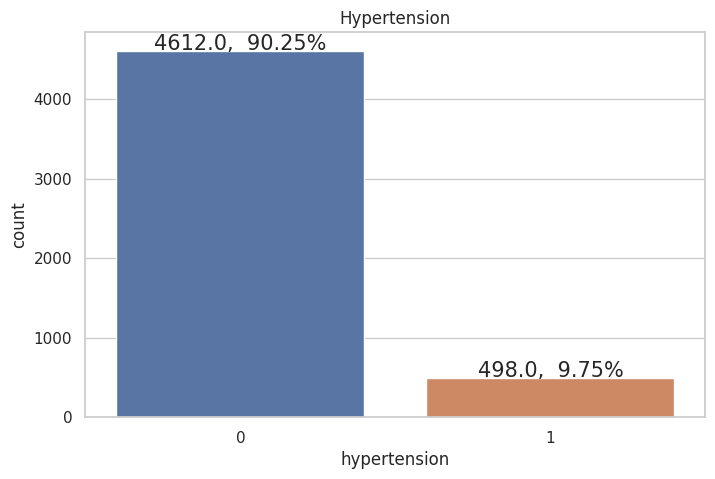

In [31]:
"""
Hypertension
"""

#Seaborn barplot
sns.set(style="whitegrid")

# Defining the plot size
plt.figure(figsize=(8, 5))
total = float(len(heart_stroke_df["hypertension"]))

# Defining the values for x-axis
# and from which dataframe the values are to be picked
plots = sns.countplot(x="hypertension" , data=heart_stroke_df)

# Iterate over the bars one-by-one
for bar in plots.patches:

	# Using Matplotlib's annotate function and
	# passing the coordinates where the annotation shall be done
    plots.annotate(f"{bar.get_height()},  {round((100 * bar.get_height()/total),2)}%",(bar.get_x() + bar.get_width() / 2,bar.get_height()),
                   ha='center', va='center',
                   size=15, xytext=(0, 5),textcoords='offset points')
# Setting the title for the graph
plt.title("Hypertension")
# showing the plot
plt.show()

4612 patients doen't have hypertension(label=0), 498 patients have hypertension(label=1)

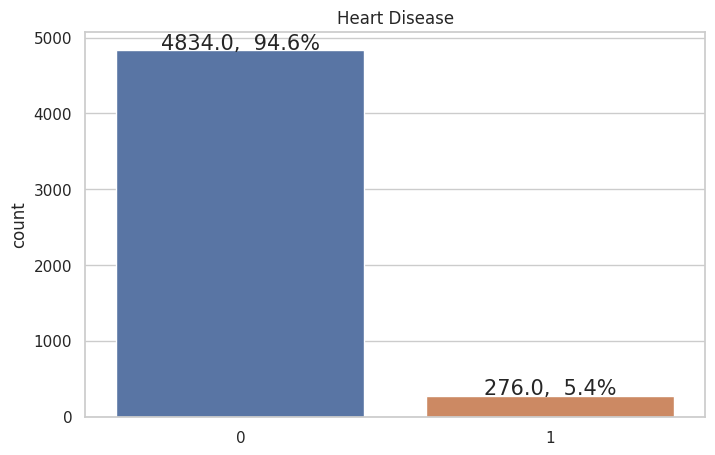

In [34]:
"""
Type of residence
"""
#Seaborn barplot
sns.set(style="whitegrid")

# Defining the plot size
plt.figure(figsize=(8, 5))
total = float(len(heart_stroke_df["heart_disease"]))

# Defining the values for x-axis
# and from which dataframe the values are to be picked
plots = sns.countplot(x="heart_disease" , data=heart_stroke_df)

# Iterate over the bars one-by-one
for bar in plots.patches:

	# Using Matplotlib's annotate function and
	# passing the coordinates where the annotation shall be done
    plots.annotate(f"{bar.get_height()},  {round((100 * bar.get_height()/total),2)}%",(bar.get_x() + bar.get_width() / 2,bar.get_height()),
                   ha='center', va='center',
                   size=15, xytext=(0, 5),textcoords='offset points')
# Setting the title for the graph
plt.title("Heart Disease")
plt.xlabel("")
# showing the plot
plt.show()

4834 patients doen't have a heart disease(label=0), 276 patients have a heart disease(label=1)

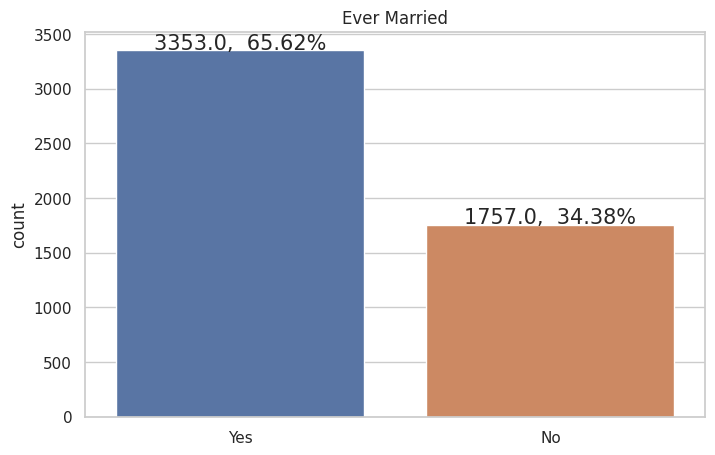

In [36]:
"""
The patient is married
"""

#Seaborn barplot
sns.set(style="whitegrid")

# Defining the plot size
plt.figure(figsize=(8, 5))
total = float(len(heart_stroke_df["ever_married"]))

# Defining the values for x-axis
# and from which dataframe the values are to be picked
plots = sns.countplot(x="ever_married" , data=heart_stroke_df)

# Iterate over the bars one-by-one
for bar in plots.patches:

	# Using Matplotlib's annotate function and
	# passing the coordinates where the annotation shall be done
    plots.annotate(f"{bar.get_height()},  {round((100 * bar.get_height()/total),2)}%",(bar.get_x() + bar.get_width() / 2,bar.get_height()),
                   ha='center', va='center',
                   size=15, xytext=(0, 5),textcoords='offset points')
# Setting the title for the graph
plt.title("Ever Married")
plt.xlabel("")
# showing the plot
plt.show()

3353 patients were/are married, 1757 patients were/are not married

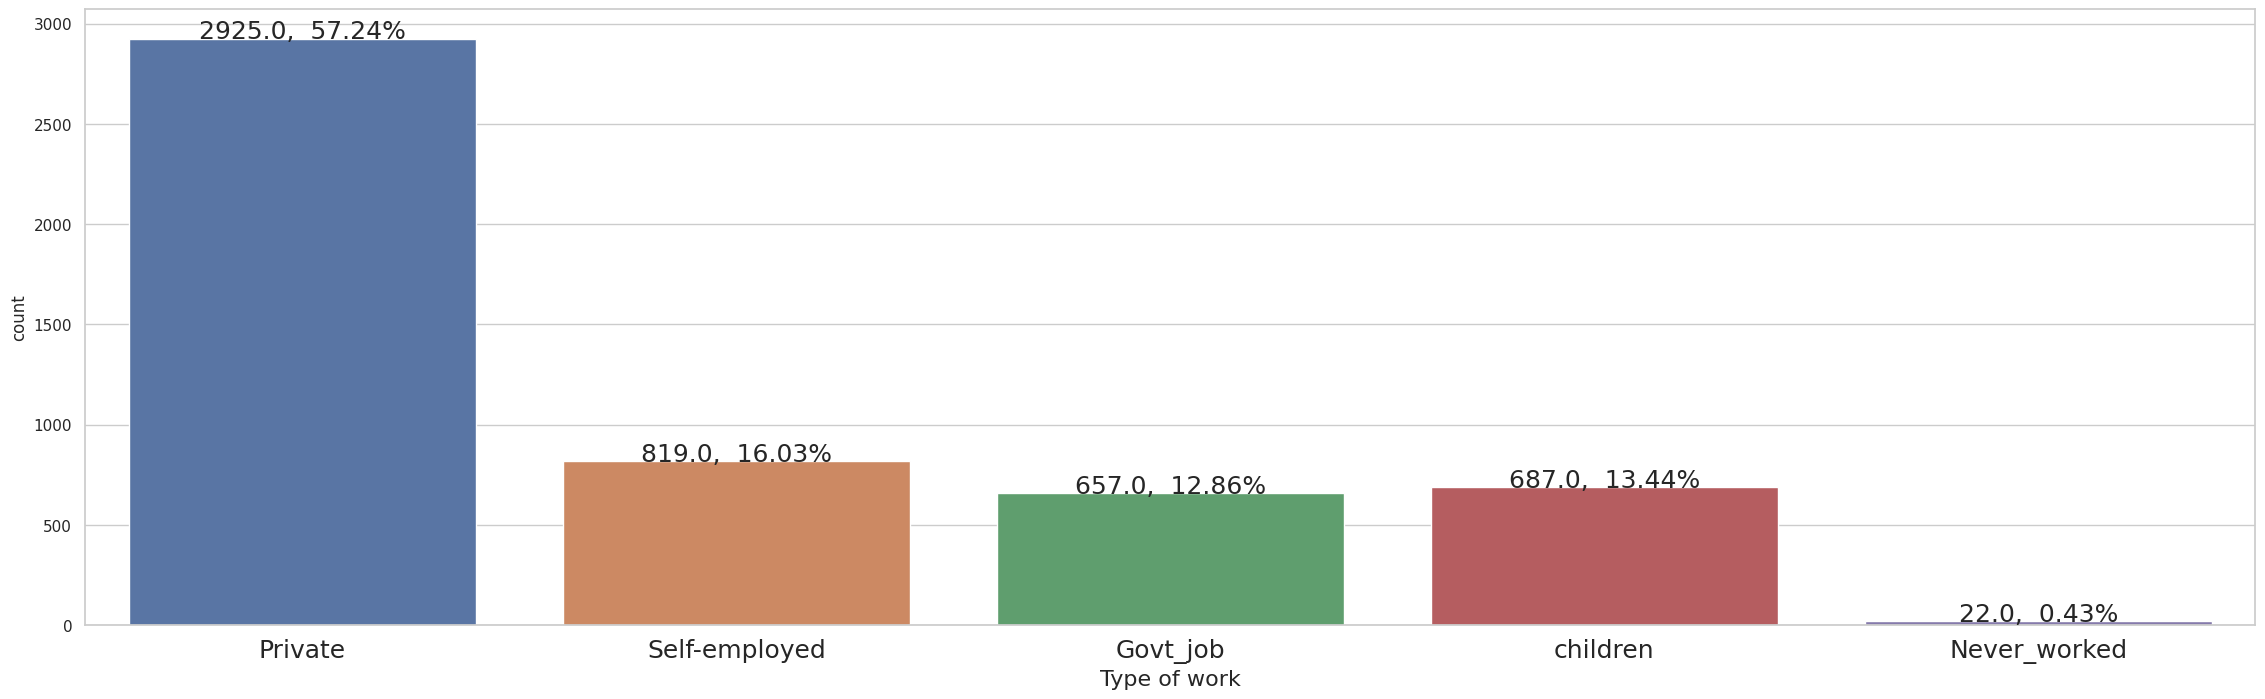

In [41]:
"""
Work type of patients
"""
sns.set(style="whitegrid")
total = sum(heart_stroke_df["work_type"].notna()) # I consider the not NaNs values
# Defining the plot size
plt.figure(figsize=(28, 8))

# Defining the values for x-axis
# and from which dataframe the values are to be picked
plots = sns.countplot(x="work_type", data=heart_stroke_df)

# Iterate over the bars one-by-one
for bar in plots.patches:

	# Using Matplotlib's annotate function and
	# passing the coordinates where the annotation shall be done
    plots.annotate(f"{bar.get_height()},  {round((100 * bar.get_height()/total),2)}%",(bar.get_x() + bar.get_width() / 2,bar.get_height()),
                   ha='center', va='center',
                   size=18, xytext=(0, 5),textcoords='offset points')
# Setting the title for the graph
plt.xlabel("Type of work", fontsize=16)
plt.xticks(fontsize=18)
# showing the plot
plt.show()

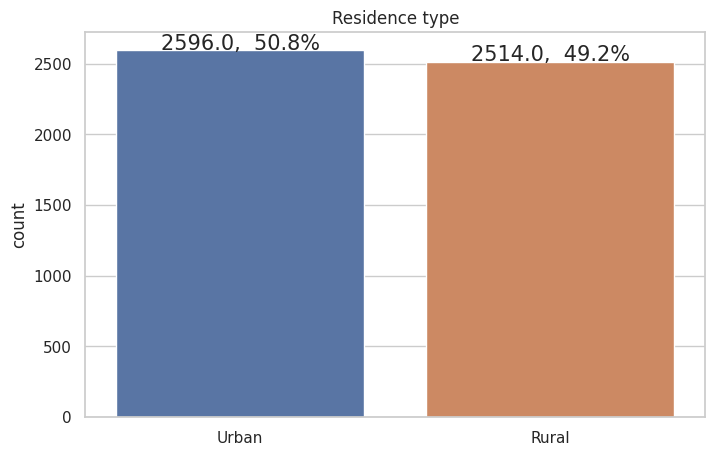

In [42]:
#Seaborn barplot
sns.set(style="whitegrid")

# Defining the plot size
plt.figure(figsize=(8, 5))
total = float(len(heart_stroke_df["Residence_type"]))

# Defining the values for x-axis
# and from which dataframe the values are to be picked
plots = sns.countplot(x="Residence_type" , data=heart_stroke_df)

# Iterate over the bars one-by-one
for bar in plots.patches:

	# Using Matplotlib's annotate function and
	# passing the coordinates where the annotation shall be done
    plots.annotate(f"{bar.get_height()},  {round((100 * bar.get_height()/total),2)}%",(bar.get_x() + bar.get_width() / 2,bar.get_height()),
                   ha='center', va='center',
                   size=15, xytext=(0, 5),textcoords='offset points')
# Setting the title for the graph
plt.title("Residence type")
plt.xlabel("")
# showing the plot
plt.show()

##### Numerical Features

<AxesSubplot: xlabel='bmi', ylabel='Count'>

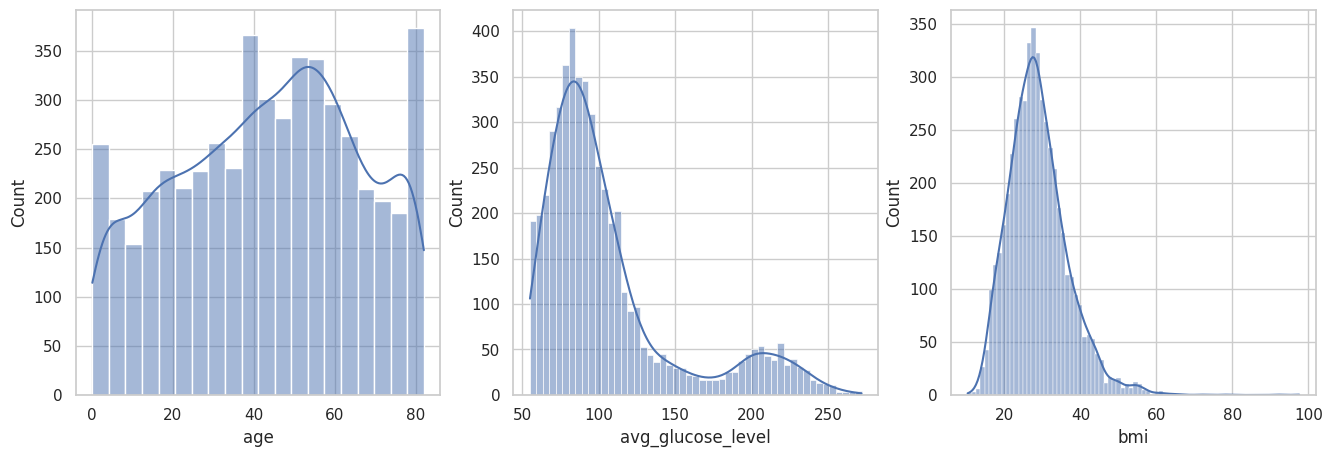

In [48]:
### DISTRIBUTION OF "age", "avg_glucose_level", "bmi" FEATURES

num_cols = heart_stroke_df[['age','avg_glucose_level','bmi']]
plt.figure(figsize=(16, 5))
plt.subplot(1, 3,1)
sns.histplot(data=heart_stroke_df ,x='age',kde=True)
plt.subplot(1, 3,2)
sns.histplot(data=heart_stroke_df ,x='avg_glucose_level',kde=True)
plt.subplot(1, 3,3)
sns.histplot(data=heart_stroke_df ,x='bmi',kde=True)

<AxesSubplot: xlabel='bmi'>

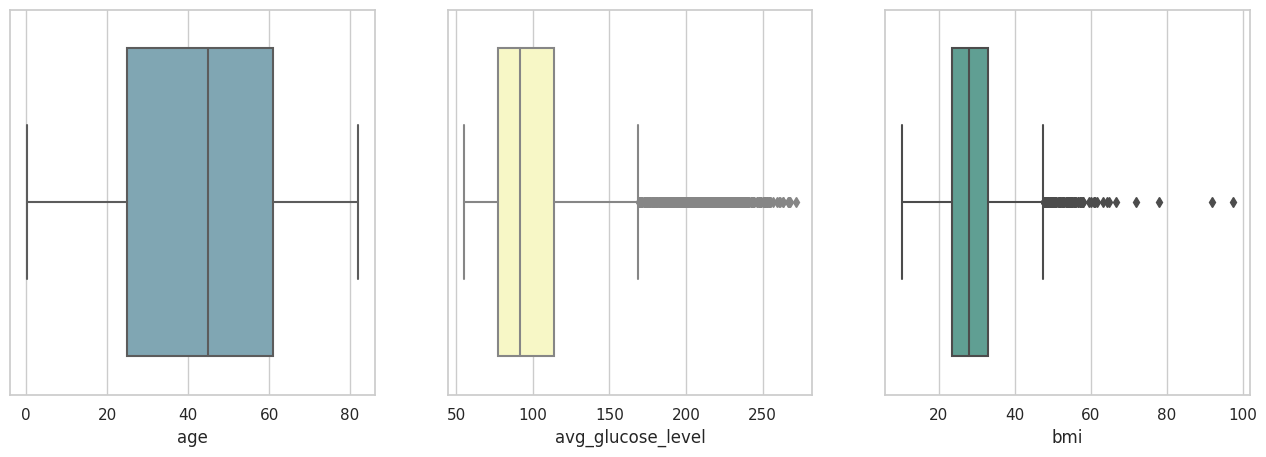

In [50]:
###BOXPLOT OF "age", "avg_glucose_level", "bmi" FEATURES

plt.figure(figsize=(16, 5))
plt.subplot(1, 3,1)
sns.boxplot(x=heart_stroke_df['age'],palette="blend:#7AB,#EDA")
plt.subplot(1, 3,2)
sns.boxplot(x=heart_stroke_df['avg_glucose_level'],palette="Spectral")
plt.subplot(1, 3,3)
sns.boxplot(x=heart_stroke_df['bmi'],palette="dark:#5A9_r")

In [51]:
age = pd.DataFrame(heart_stroke_df["age"])
print("the average value of age is: ",float(age.mean()))
print("the median is: ", float(age.median()))
print("the mode is: 78.0")
print("the oldest patient has: ",int(age.max()),"years old")
print("the youngest patient has: ",int(age.min()),"years old")

the average value of age is:  43.226614481409
the median is:  45.0
the mode is: 78.0
the oldest patient has:  82 years old
the youngest patient has:  0 years old


In [55]:
glucose = pd.DataFrame(heart_stroke_df["avg_glucose_level"])
print("the average level of glucose is: ",float(glucose.mean()), "mg/dl")
print("the median is: ", float(glucose.median()),"mg/dl")
print("the mode is: 93.88 mg/dl")
print("the highest level of glucose is: ",int(glucose.max()),"mg/dl")
print("the lowest plevel of glucose is: ",int(glucose.min()),"mg/dl")

the average level of glucose is:  106.1476771037182 mg/dl
the median is:  91.88499999999999 mg/dl
the mode is: 93.88 mg/dl
the highest level of glucose is:  271 mg/dl
the lowest plevel of glucose is:  55 mg/dl


In [58]:
bmi = pd.DataFrame(heart_stroke_df["bmi"])
print("the average level of glucose is: ",float(bmi.mean()))
print("the median is: ", float(bmi.median()),"mg/dl")
print("the mode is: 28.7")
print("the highest level of glucose is: ",int(bmi.max()))
print("the lowest plevel of glucose is: ",int(bmi.min()))

the average level of glucose is:  28.893236911794666
the median is:  28.1 mg/dl
the mode is: 28.7
the highest level of glucose is:  97
the lowest plevel of glucose is:  10


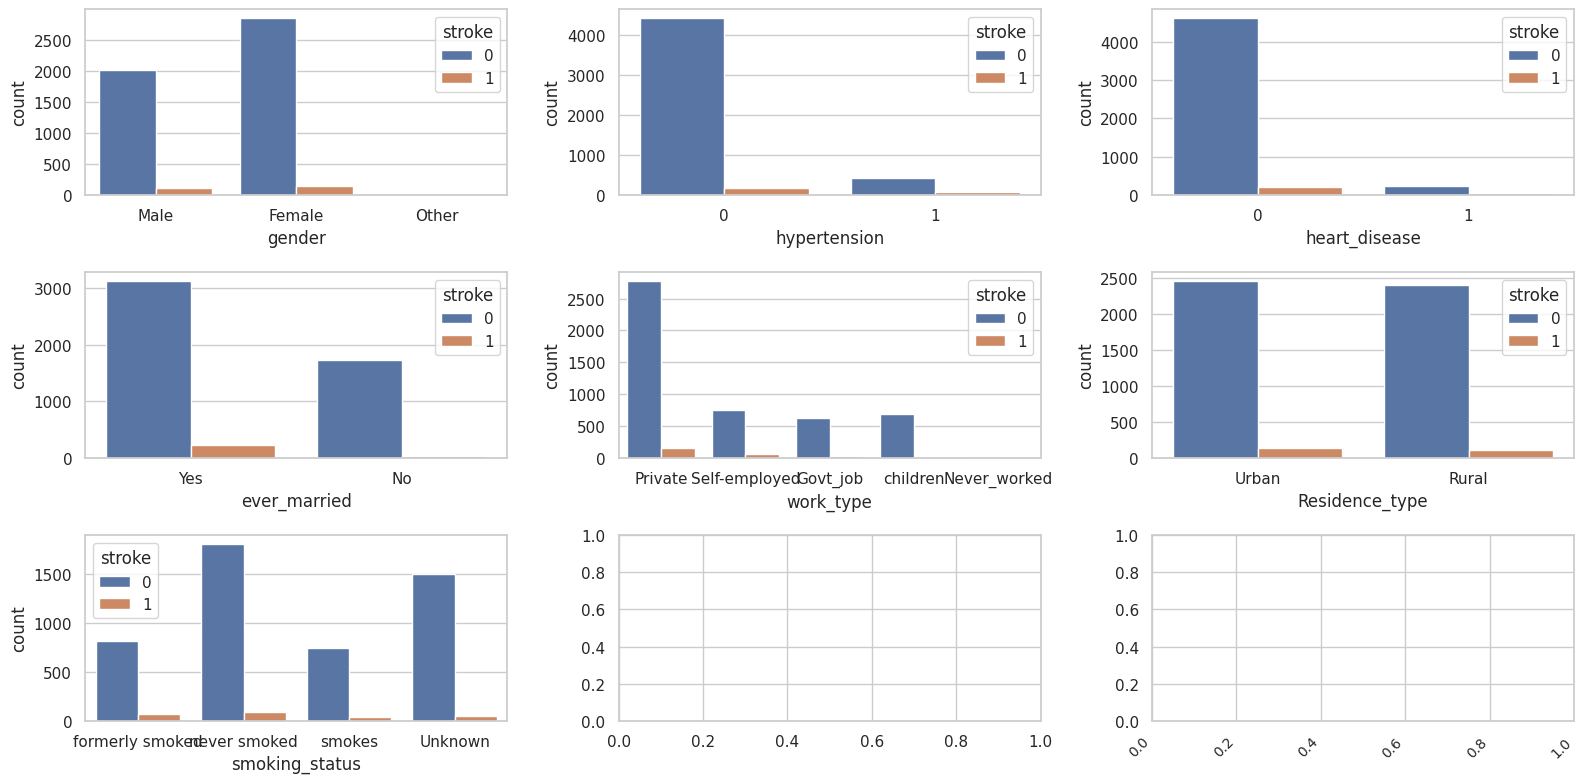

In [80]:
# plots between categoical features and target
ncols = 3
cat_cols =  ["gender", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "smoking_status"]

fig,ax = plt.subplots(3, 3,figsize=(16, 8))


for idx, feature in enumerate(cat_cols):
    row = idx//ncols
    col = idx% ncols
    sns.countplot(data=heart_stroke_df, x=feature, hue='stroke',ax =ax[row,col])
    plt.xticks(fontsize=10)

plt.tight_layout()